# 퍼셉트론

- 퍼셉트론을 구현해보자
  - AND 게이트 구현

In [41]:
def AND(x1, x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = x1*w1+x2*w2
    if tmp<=theta:
        return 0
    elif tmp>theta:
        return 1
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


- 물론 앞에서 구현한 AND 게이트는 직관적이고 알기 쉽지만, 앞으로를 생각해서 다른 방식으로 수정해보자.
  - 편향이라는 개념을 도입하여, 퍼셉트론은 입력신호에 가중치를 곱한 값과 편향을 더하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다. 

In [42]:
import numpy as np
x = np.array([0,1])       # 입력
w = np.array([0.5,0.5])   # 가중치
b = -0.7                  # 편향
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b)

[0.  0.5]
0.5
-0.19999999999999996


---

- 가중치와 편향을 도입한 AND 게이트는 다음과 같이 구현할 수 있다. 

In [43]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(x*w) + b
    if tmp<=0 :
        return 0
    elif tmp >0 :
        return 1

- w1,w2는 각 입력 신호가 결과에 주는 영향력을 조절하는 매개변수이고, 편향을 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다.

In [44]:
def NAND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    tmp = np.sum(x*w) + b
    if tmp<=0 :
        return 0
    elif tmp >0 :
        return 1
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    tmp = np.sum(x*w) + b
    if tmp<=0 :
        return 0
    elif tmp >0 :
        return 1

- AND, NAND, OR 모두 같은 구조의 퍼셉트론이고 차이는 가중치 매개변수의 값뿐이다. 실제로 파이썬으로 작성한 NAND와 OR 게이트의 코드에서도  AND와 다른 곳은 가중치와 편향 값을 설정하는 부분뿐이다. 

---

- XOR 게이트
  - 배타적 논리합이라는 논리회로이다. 한쪽이 1일때만 1을 출력. OR게이트와 달리 둘 다 1일때는 출력하지 않는다. 
  - 지금까지 본 퍼셉트론의 구조로는 이 XOR 게이트를 구현할 수 없다. 

(0.0, 2.0)

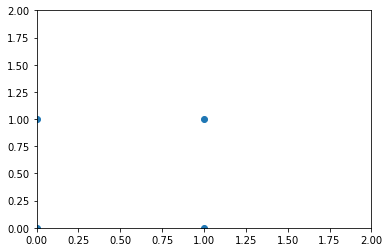

In [45]:
import matplotlib.pyplot as plt
plt.scatter([0,0,1,1],[0,1,0,1])
plt.xlim(0,2)
plt.ylim(0,2)

- (0,0)(1,1),(1,0)(0,1)이 두 묶음을 각각 나눌 수 있는 직선은 있을 수 없다.
- 하지만 직선이라는 제약을 없앤다면 가능하다
- 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다. 곡선은 표현할 수 없다. 
- 퍼셉트론으로는 XOR 게이트를 표현할 수 없지만 층을 쌓아 다층 퍼셉트론을 통해 구현할 수 있다.

---

- AND, OR NAND 게이트를 조합하여 XOR게이트를 만들 수 있다.
- 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다. 단층 퍼셉트론으로는 비선형 영역을 분리할 수 없다.
- 퍼셉트론을 조합하여 즉, 층을 쌓아서 XOR 게이트를 구현하는 것이다.

In [46]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [47]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


- 이처럼 퍼셉트론은 층을 쌓아 더 다양한 것을 표현할 수 있다.

---

### Conclusion
- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 가중치와 편향을 매개변수로 설정한다. 
- 퍼셉트론으로 AND,OR 게이트 등의 논리 회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터도 표현할 수 있다.